### <font color="orange">ライブラリインポート</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import japanize_matplotlib

In [2]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

In [3]:
# データフレームを水平に表示する。
def show_many_dfs(*dfs, n=10):
    class HorizontalDisplay:
        def _repr_html_(self):
            template = '<div style="float: left; padding: 5px;">{}</div>'
            return  ''.join(template.format(df.head(n)._repr_html_()) for df in dfs)
    return HorizontalDisplay()

### <font color="orange">データ読み込み</font>

In [4]:
data = pd.read_csv("./maked_data.csv")

# pitch_nameのエンコーディングをもとに戻す。
pitch_name_encording = {
    0 : "Sweeper",
    1 : "4-Seam Fastball",
    2 : "other"
}
data["pitch_name"] = data["pitch_name"].map(pitch_name_encording)

data_2022 = data[data["game_year"]==2022]
data_2023 = data[data["game_year"]==2023]
data_all = data

datas = {
    "data_2022" : data_2022,
    "data_2023" : data_2023,
    "data_all" : data_all
}
datas["data_all"].head()

,pitch_name,game_year,game_month,game_day,home_team,LAA_score,ENEMY_score,stand,on_3b,on_2b,on_1b,inning,pitch_number,outs_when_up,balls,strikes,sz_top,sz_bot,is_first_pitch_number,release_speed,release_pos_x,release_pos_y,release_pos_z,release_spin_rate,release_extension,plate_x,plate_z,events,description,zone,type,hc_x,hc_y
0,4-Seam Fastball,2022,4,7,0,0,0,0,0,0,0,1,1,0,0,0,2.90,1.26,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4-Seam Fastball,2022,4,7,0,0,0,0,0,0,0,1,2,0,1,0,2.90,1.28,0,99.8,-2.19,53.43,5.82,2182.0,7.1,1.32,-0.29,19.0,0.0,14.0,1.0,0.0,0.0
2,4-Seam Fastball,2022,4,7,0,0,0,0,0,0,0,1,3,0,1,1,2.81,1.21,0,97.9,-2.16,53.54,5.89,2164.0,7.0,-0.62,2.01,19.0,2.0,4.0,0.0,0.0,0.0
3,Sweeper,2022,4,7,0,0,0,0,0,0,0,1,4,0,2,1,2.79,1.30,0,99.2,-2.13,53.63,5.87,2320.0,6.9,1.53,1.84,19.0,0.0,14.0,1.0,0.0,0.0
4,other,2022,4,7,0,0,0,0,0,0,0,1,5,0,2,2,2.83,1.23,0,86.9,-2.29,53.52,5.77,2440.0,7.0,-0.64,1.74,19.0,2.0,7.0,0.0,0.0,0.0


In [5]:
# shape
datas["data_2022"].shape, datas["data_2023"].shape, datas["data_all"].shape

((2629, 33), (2094, 33), (4723, 33))

In [6]:
# dtypes
data.dtypes

pitch_name                object
game_year                  int64
game_month                 int64
game_day                   int64
home_team                  int64
LAA_score                  int64
ENEMY_score                int64
stand                      int64
on_3b                      int64
on_2b                      int64
on_1b                      int64
inning                     int64
pitch_number               int64
outs_when_up               int64
balls                      int64
strikes                    int64
sz_top                   float64
sz_bot                   float64
is_first_pitch_number      int64
release_speed            float64
release_pos_x            float64
release_pos_y            float64
release_pos_z            float64
release_spin_rate        float64
release_extension        float64
plate_x                  float64
plate_z                  float64
events                   float64
description              float64
zone                     float64
type      

In [7]:
datas["data_2022"].describe().T

,count,mean,std,min,25%,50%,75%,max
game_year,2629.0,2022.000000,0.000000,2022.00,2022.0000,2022.00,2022.000,2022.00
game_month,2629.0,6.812476,1.731452,4.00,5.0000,7.00,8.000,10.00
game_day,2629.0,15.936097,8.774341,2.00,9.0000,16.00,23.000,29.00
home_team,2629.0,0.470521,0.499225,0.00,0.0000,0.00,1.000,1.00
LAA_score,2629.0,1.254469,1.740462,0.00,0.0000,0.00,2.000,7.00
ENEMY_score,2629.0,0.605934,0.943968,0.00,0.0000,0.00,1.000,5.00
stand,2629.0,0.489159,0.499978,0.00,0.0000,0.00,1.000,1.00
on_3b,2629.0,0.047927,0.213652,0.00,0.0000,0.00,0.000,1.00
on_2b,2629.0,0.155953,0.362880,0.00,0.0000,0.00,0.000,1.00
on_1b,2629.0,0.281476,0.449805,0.00,0.0000,0.00,1.000,1.00


### <font color="orange">年間ごとの球種別投球数</font>

In [8]:
# 年間ごとの球種別投球数

normalize = True
df_pitch_count_2022 = data_2022["pitch_name"].value_counts(normalize=normalize).round(2).to_frame()
df_pitch_count_2023 = data_2023["pitch_name"].value_counts(normalize=normalize).round(2).to_frame()
df_pitch_count_all = data_all["pitch_name"].value_counts(normalize=normalize).round(2).to_frame()

if normalize:
    df_pitch_count_2022.loc["total"] = 1
    df_pitch_count_2023.loc["total"] = 1
    df_pitch_count_all.loc["total"] = 1
else:
    df_pitch_count_2022.loc["total"] = data_2022.shape[0]
    df_pitch_count_2023.loc["total"] = data_2023.shape[0]
    df_pitch_count_all.loc["total"] = data_all.shape[0]

show_many_dfs(df_pitch_count_2022, df_pitch_count_2023, df_pitch_count_all)

,proportion
pitch_name,
Sweeper,0.37
other,0.35
4-Seam Fastball,0.27
total,1.00
,proportion
pitch_name,
Sweeper,0.35
4-Seam Fastball,0.33
other,0.32


### <font color="orange">左打者、右打者の配球</font>

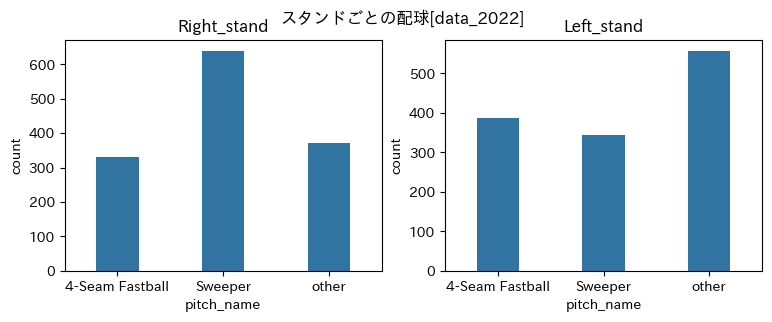

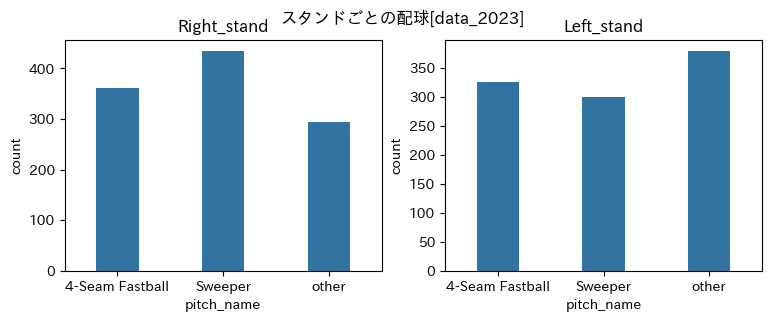

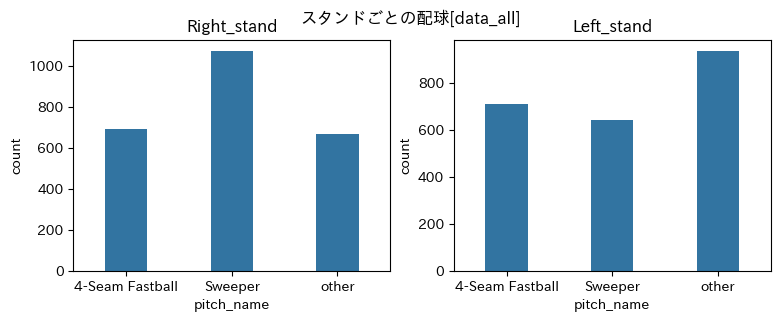

In [9]:
# 左打者、右打者の配球

def make_df_pitch_selection_by_stand(normalize=False, show_display=False):
    
    y = ["Sweeper", "4-Seam Fastball", "other"]

    for key, value in datas.items():
        df_right_stand = value[value["stand"]==0]["pitch_name"].value_counts().sort_index().to_frame().reset_index()
        df_left_stand = value[value["stand"]==1]["pitch_name"].value_counts().sort_index().to_frame().reset_index()

        if show_display:
            display(show_many_dfs(df_right_stand, df_left_stand))

        fig, axes = plt.subplots(1,2, figsize=(9,3))
        sns.barplot(data=df_right_stand, x="pitch_name", y="count", width=0.4, ax=axes[0])
        sns.barplot(data=df_left_stand, x="pitch_name", y="count", width=0.4, ax=axes[1])

        axes[0].set_title("Right_stand")
        axes[1].set_title("Left_stand")

        fig.suptitle(f"スタンドごとの配球[{key}]")

        plt.show()

make_df_pitch_selection_by_stand()

In [10]:
data.head()

,pitch_name,game_year,game_month,game_day,home_team,LAA_score,ENEMY_score,stand,on_3b,on_2b,on_1b,inning,pitch_number,outs_when_up,balls,strikes,sz_top,sz_bot,is_first_pitch_number,release_speed,release_pos_x,release_pos_y,release_pos_z,release_spin_rate,release_extension,plate_x,plate_z,events,description,zone,type,hc_x,hc_y
0,4-Seam Fastball,2022,4,7,0,0,0,0,0,0,0,1,1,0,0,0,2.90,1.26,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4-Seam Fastball,2022,4,7,0,0,0,0,0,0,0,1,2,0,1,0,2.90,1.28,0,99.8,-2.19,53.43,5.82,2182.0,7.1,1.32,-0.29,19.0,0.0,14.0,1.0,0.0,0.0
2,4-Seam Fastball,2022,4,7,0,0,0,0,0,0,0,1,3,0,1,1,2.81,1.21,0,97.9,-2.16,53.54,5.89,2164.0,7.0,-0.62,2.01,19.0,2.0,4.0,0.0,0.0,0.0
3,Sweeper,2022,4,7,0,0,0,0,0,0,0,1,4,0,2,1,2.79,1.30,0,99.2,-2.13,53.63,5.87,2320.0,6.9,1.53,1.84,19.0,0.0,14.0,1.0,0.0,0.0
4,other,2022,4,7,0,0,0,0,0,0,0,1,5,0,2,2,2.83,1.23,0,86.9,-2.29,53.52,5.77,2440.0,7.0,-0.64,1.74,19.0,2.0,7.0,0.0,0.0,0.0


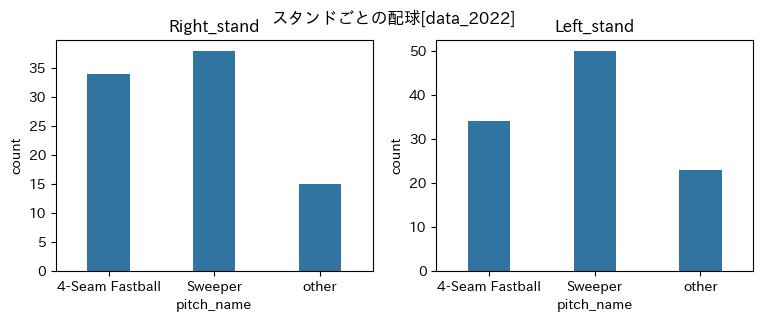

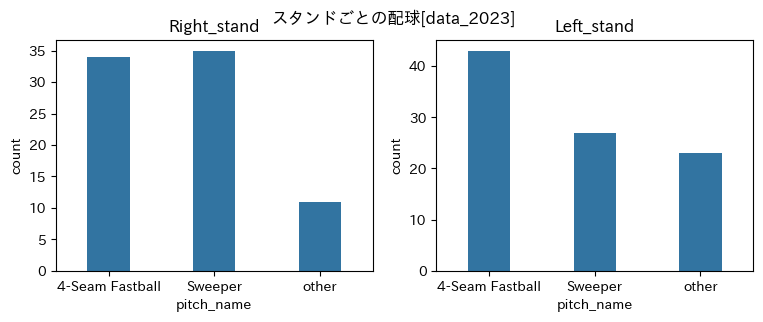

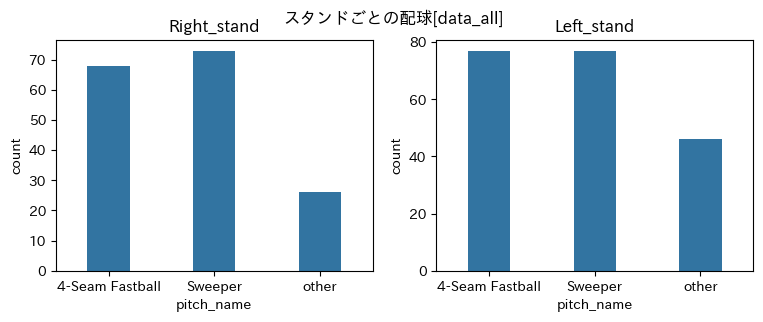

In [11]:
# ボールカウントが3のときのstandごとの配球

def make_df_pitch_selection_by_stand_when_3balls(normalize=False, show_display=False):
    
    y = ["Sweeper", "4-Seam Fastball", "other"]

    for key, value in datas.items():
        df_right_stand = value.query("stand == 0 and balls ==3")["pitch_name"].value_counts().sort_index().to_frame().reset_index()
        df_left_stand = value.query("stand == 1 and balls ==3")["pitch_name"].value_counts().sort_index().to_frame().reset_index()

        if show_display:
            display(show_many_dfs(df_right_stand, df_left_stand))

        fig, axes = plt.subplots(1,2, figsize=(9,3))
        sns.barplot(data=df_right_stand, x="pitch_name", y="count", width=0.4, ax=axes[0])
        sns.barplot(data=df_left_stand, x="pitch_name", y="count", width=0.4, ax=axes[1])

        axes[0].set_title("Right_stand")
        axes[1].set_title("Left_stand")

        fig.suptitle(f"スタンドごとの配球[{key}]")

        plt.show()

make_df_pitch_selection_by_stand_when_3balls()

In [12]:
data.head()

,pitch_name,game_year,game_month,game_day,home_team,LAA_score,ENEMY_score,stand,on_3b,on_2b,on_1b,inning,pitch_number,outs_when_up,balls,strikes,sz_top,sz_bot,is_first_pitch_number,release_speed,release_pos_x,release_pos_y,release_pos_z,release_spin_rate,release_extension,plate_x,plate_z,events,description,zone,type,hc_x,hc_y
0,4-Seam Fastball,2022,4,7,0,0,0,0,0,0,0,1,1,0,0,0,2.90,1.26,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4-Seam Fastball,2022,4,7,0,0,0,0,0,0,0,1,2,0,1,0,2.90,1.28,0,99.8,-2.19,53.43,5.82,2182.0,7.1,1.32,-0.29,19.0,0.0,14.0,1.0,0.0,0.0
2,4-Seam Fastball,2022,4,7,0,0,0,0,0,0,0,1,3,0,1,1,2.81,1.21,0,97.9,-2.16,53.54,5.89,2164.0,7.0,-0.62,2.01,19.0,2.0,4.0,0.0,0.0,0.0
3,Sweeper,2022,4,7,0,0,0,0,0,0,0,1,4,0,2,1,2.79,1.30,0,99.2,-2.13,53.63,5.87,2320.0,6.9,1.53,1.84,19.0,0.0,14.0,1.0,0.0,0.0
4,other,2022,4,7,0,0,0,0,0,0,0,1,5,0,2,2,2.83,1.23,0,86.9,-2.29,53.52,5.77,2440.0,7.0,-0.64,1.74,19.0,2.0,7.0,0.0,0.0,0.0


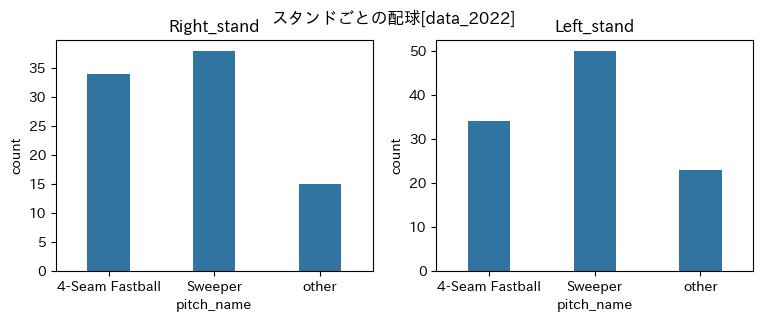

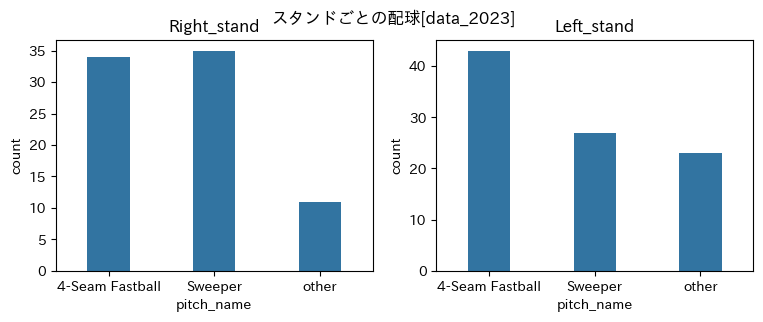

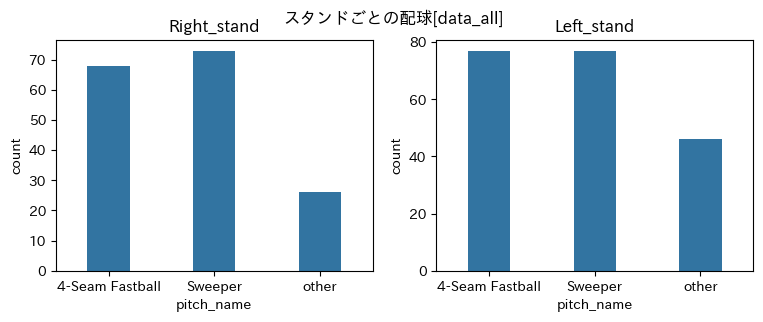

In [13]:
# ストライクカウントが2のときのstandごとの配球

def make_df_pitch_selection_by_stand_when_2strikes(normalize=False, show_display=False):
    
    y = ["Sweeper", "4-Seam Fastball", "other"]

    for key, value in datas.items():
        df_right_stand = value.query("stand == 0 and balls ==3")["pitch_name"].value_counts().sort_index().to_frame().reset_index()
        df_left_stand = value.query("stand == 1 and balls ==3")["pitch_name"].value_counts().sort_index().to_frame().reset_index()

        if show_display:
            display(show_many_dfs(df_right_stand, df_left_stand))

        fig, axes = plt.subplots(1,2, figsize=(9,3))
        sns.barplot(data=df_right_stand, x="pitch_name", y="count", width=0.4, ax=axes[0])
        sns.barplot(data=df_left_stand, x="pitch_name", y="count", width=0.4, ax=axes[1])

        axes[0].set_title("Right_stand")
        axes[1].set_title("Left_stand")

        fig.suptitle(f"スタンドごとの配球[{key}]")

        plt.show()

make_df_pitch_selection_by_stand_when_2strikes()